In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt;
#NLP
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#Other Technique
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
import pickle

In [28]:
data = pd.read_csv("arxiv.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'arxiv.csv'

In [ ]:
np.unique(data['categories']).shape

(56527,)

In [ ]:
first_label = []
for i in range (data['categories'].shape[0]):
    classes = data['categories'][i].split(' ')
    first_label.append(classes[0])

In [ ]:
np.unique(first_label).shape

(164,)

In [ ]:
data.head()

,abstract,categories
0,A fully differential calculation in perturba...,hep-ph
1,"We describe a new algorithm, the $(k,\ell)$-...",math.CO cs.CG
2,The evolution of Earth-Moon system is descri...,physics.gen-ph
3,We show that a determinant of Stirling cycle...,math.CO
4,In this paper we show how to compute the $\L...,math.CA math.FA


In [ ]:
class techniques:
    
    def LinearSVC(self, data, target):
        model = Pipeline([('vect',CountVectorizer()), ('tfidf', TfidfTransformer()),('linear-svm', LinearSVC())])
        model = model.fit(data, target)
        return model

    def BernoulliNB(self,data, target):
        model = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', BernoulliNB())])
        model = model.fit(data, target)
        return model

In [ ]:
technique = techniques()
Linear_model = technique.LinearSVC(data['abstract'], first_label)

In [ ]:
pre=Linear_model.predict(data['abstract'])

In [ ]:
linearAcc = np.mean(pre == first_label)
print(linearAcc)

0.8340086666666666


In [29]:
#save the model
with open('savedModels/Arxiv/LinearSVCModel', 'wb') as picklefile:
    pickle.dump(Linear_model,picklefile)

In [30]:
#Load the model
with open('savedModels/Arxiv/LinearSVCModel', 'rb') as training_model:
    loaded_SVC = pickle.load(training_model)

In [32]:
#Test_loaded
print(loaded_SVC.predict(data['abstract'][0:1]))

['hep-ph']


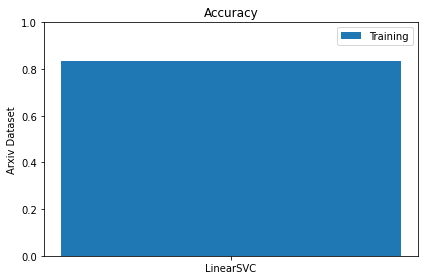

In [40]:
labels = ['LinearSVC']

x = np.arange(len(labels))  # the label locations
width = 0.33  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 0, [linearAcc], width, label='Training')
#rects2 = ax.bar(x + width/2, [ourModelTestingAcc,Paper1TestingAcc,Paper2TestingAcc], width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.0])
ax.set_ylabel('Arxiv Dataset')
ax.set_title('Accuracy')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(array1, padding=3)
#ax.bar_label(rects2, padding=3)
#ax.bar_label(rects3, padding=3)

fig.tight_layout()

plt.show()